# Filtrado de Spam en Emails

Los clasificadores Bayesianos ingenuos son herramientas de gran utilidad para la construcción de sistemas de clasificación. Esta es una aplicación de modelos probabilisticos para la deteccion de mensajes de Spam en Emails.

In [1]:
# Cargamos las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB


In [2]:
# Cargamos el dataset
data = pd.read_csv("C:/Users/crisd/OneDrive/Escritorio/libros/project/emails.csv",
                   usecols=["text", "spam"])

# Limpiamos el dataset de los valores nulos
data.dropna(inplace=True)

# Cambiamos los tipos de datos de las columnas
data['text'] = data['text'].astype(str)
data['spam'] = data['spam'].astype(int)

# Mostramos el dataset
data.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
# Mostramos el tamaño del dataset
data.shape


(5726, 2)

In [4]:
# Mostramos el numero de mensajes spam y no spam
data.spam.value_counts()


0    4359
1    1367
Name: spam, dtype: int64

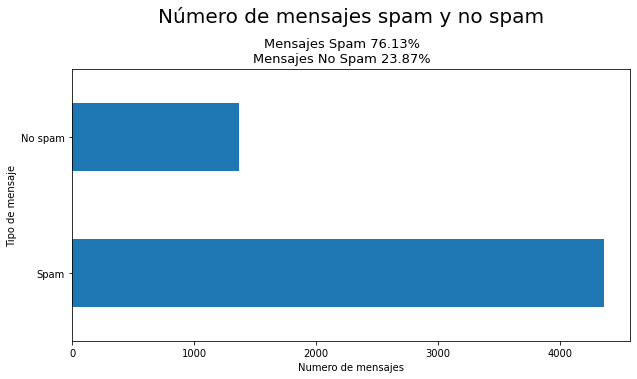

In [5]:
# Mostramos el numero de mensajes spam y no spam en un grafico
prop = (data.spam.value_counts() / len(data))*100
plt.figure(figsize=(10, 5))
data.spam.value_counts().plot.barh()
plt.suptitle(f"Mensajes Spam {prop[0]:.2f}%\nMensajes No Spam {prop[1]:.2f}%",
             fontsize=13, y=0.97)
plt.title("Número de mensajes spam y no spam",
          fontsize=20, y=1.15)
plt.xlabel("Numero de mensajes")
plt.ylabel("Tipo de mensaje")
plt.yticks(range(2), ['Spam', 'No spam'])
plt.show()


In [6]:
# Vamos a reducir cada palabra del dataset a su raíz
stemmer = PorterStemmer()
data['txt_stm'] = data.text.apply(lambda x: ' '.join(
    [stemmer.stem(word) for word in x.split()]))
data.head()


,text,spam,txt_stm
0,Subject: naturally irresistible your corporate...,1,subject: natur irresist your corpor ident lt i...
1,Subject: the stock trading gunslinger fanny i...,1,subject: the stock trade gunsling fanni is mer...
2,Subject: unbelievable new homes made easy im ...,1,subject: unbeliev new home made easi im want t...
3,Subject: 4 color printing special request add...,1,subject: 4 color print special request addit i...
4,"Subject: do not have money , get software cds ...",1,"subject: do not have money , get softwar cd fr..."


In [7]:
# Vamos a crear un vector de palabras para cada mensaje
cv = CountVectorizer(analyzer='word',               # Analizador de palabras
                     lowercase=True,                # Convertir a minúsculas
                     stop_words='english',          # Eliminar palabras vacías (stopwords)
                     token_pattern=r'(?u)\b\w+\b',  # Expresión regular para tokenizar
                     binary=True,                   # Solo uno o cero
                     max_df=1.0,                    # Eliminar palabras que aparecen muchas veces
                     min_df=5)                      # Eliminar palabras que aparecen pocas veces

# Aplicamos el vectorizador a los mensajes
X = cv.fit_transform(data.txt_stm)
X.shape


(5726, 7542)

In [8]:
# Vamos a generar el dictorio de palabras
vocabulary = cv.get_feature_names_out()
len(vocabulary)


7542

In [9]:
# Mostramos las primeras palabras del dictorio
vocabulary[:15]


array(['0', '00', '000', '0000', '0000108729', '0001', '001', '0011',
       '002', '0044', '0061', '007', '01', '0100', '011'], dtype=object)

In [10]:
# Mejoramos el vectorizador para que solo se vea el texto
cv = CountVectorizer(analyzer='word',                               # Analizador de palabras
                        lowercase=True,                             # Convertir a minúsculas
                        stop_words='english',                       # Eliminar palabras vacías (stopwords)
                        token_pattern=r'(?u)\b[a-zA-Z][a-zA-Z]+\b', # Expresión regular para tokenizar (solo letras)
                        binary=True,                                # Solo uno o cero
                        max_df=1.0,                                 # Eliminar palabras que aparecen muchas veces
                        min_df=5)                                   # Eliminar palabras que aparecen pocas veces

# Aplicamos el vectorizador a los mensajes
X = cv.fit_transform(data.txt_stm)
X.shape


(5726, 6785)

In [11]:
# Generamos el nuevo dictorio de palabras
vocabulary = cv.get_feature_names_out()
vocabulary[:15]


array(['aa', 'aaa', 'aaron', 'ab', 'abandon', 'abel', 'abil', 'abl',
       'abov', 'abreast', 'abroad', 'absenc', 'absolut', 'absorb',
       'abstract'], dtype=object)

In [12]:
# Generamos un transformador de palabras para reconstruir el texto y ver que palabras se eliminaron
def inverse_transform(X, vocabulary, index):
    as_list = X[index, :].toarray().tolist()
    docs = []
    for i in index:
        k = [vocabulary[iword]
             for iword, ifreq in enumerate(as_list[i]) if ifreq > 0]
        docs += [k]
    return docs


for i, x in enumerate(inverse_transform(X, vocabulary, range(1))):
    print('Org:', data.txt_stm[i])
    print('Mod:', ' '.join(x))
    print('')


Org: subject: natur irresist your corpor ident lt is realli hard to recollect a compani : the market is full of suqgest and the inform isoverwhelminq ; but a good catchi logo , stylish statloneri and outstand websit will make the task much easier . we do not promis that havinq order a iogo your compani will automaticaili becom a world ieader : it isguit ciear that without good product , effect busi organ and practic aim it will be hotat nowaday market ; but we do promis that your market effort will becom much more effect . here is the list of clear benefit : creativ : hand - made , origin logo , special done to reflect your distinct compani imag . conveni : logo and stationeri are provid in all format ; easi - to - use content manag system letsyou chang your websit content and even it structur . prompt : you will see logo draft within three busi day . afford : your market break - through shouldn ' t make gap in your budget . 100 % satisfact guarante : we provid unlimit amount of chang 

In [13]:
# Separamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, data.spam, test_size=0.2, random_state=42, shuffle=True)

# Mostramos la distribución de los objetivos en el entrenamiento
y_train.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'


0    76.48%
1    23.52%
Name: spam, dtype: object

In [14]:
# Vamos a balancear los datos de entrenamiento
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)


In [15]:
# Volvemos a mostrar la distribución de los objetivos en el entrenamiento
y_train.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'


0    50.0%
1    50.0%
Name: spam, dtype: object

In [16]:
# Creamos el modelo
model = BernoulliNB(alpha=1.1)

# Entrenamos el modelo
model.fit(X_train, y_train)


BernoulliNB(alpha=1.1)

In [17]:
# Predecimos los resultados
y_hat = model.predict(X_test)

# Evaluamos el modelo
acc_test = accuracy_score(y_test, y_hat)
acc_train = accuracy_score(y_train, model.predict(X_train))
print(f"Accuracy, in test: {acc_test:.3f}%")
print(f'Accuracy, in train: {acc_train:.3f}%')

Accuracy, in test: 0.866%
Accuracy, in train: 0.928%


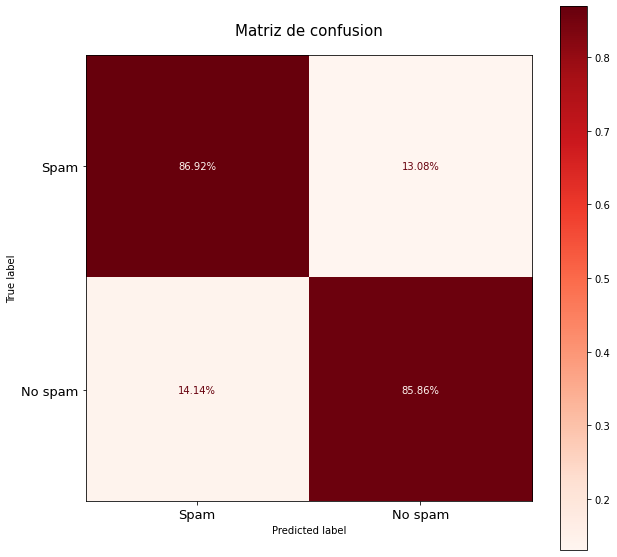

In [18]:
# Creamos la matriz de confusion
cm = confusion_matrix(y_test, y_hat, normalize='true')

# Mostramos la matriz de confusion
fig, ax = plt.subplots(figsize=(10, 10))
cm_g = ConfusionMatrixDisplay(cm, display_labels=['Spam', 'No spam'])
cm_g.plot(cmap='Reds', values_format='.2%', ax=ax )
plt.title("Matriz de confusion", fontsize=15, y=1.03)
plt.tick_params(labelsize=13)
plt.show()